***
# **Project 1 - Analisis Jejaring Sosial**

1. Keenan Ariqul Hashim - 1301202323
2. Risky Aditya Mangngalle - 130120

***

# **Pra Pemrosesan Data 🧹**

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/pilpres1.csv", sep=';')
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Nov 09 23:39:31 +0000 2023,1722760863239827545,@Tan_Mar3M Nanti ada saatnya ini orang ditangk...,0,0,0,0,in,1167048413109555201,1722217892115337287,salehali2019,https://twitter.com/salehali2019/status/172276...
1,Thu Nov 09 23:39:30 +0000 2023,1722760859683000377,@korhurint @Paltiwest Tanpa mengecilkan arti P...,0,0,0,0,in,841247796,1722424503702331733,motikatrok,https://twitter.com/motikatrok/status/17227608...
2,Thu Nov 09 23:39:09 +0000 2023,1722760769656504651,@beautylaughter @kdrama_menfess TvN kan sering...,0,0,0,0,in,496481136,1722601889123143794,Gaassee,https://twitter.com/Gaassee/status/17227607696...
3,Thu Nov 09 23:39:05 +0000 2023,1722760751792927161,"@moviemenfes sebenernya gpp di remake, tp gue ...",0,0,0,0,in,1062585300109545472,1722596151025869179,heinnana,https://twitter.com/heinnana/status/1722760751...
4,Thu Nov 09 23:39:02 +0000 2023,1722760740921327657,Bakal calon presiden Ganjar Pranowo menyentil ...,0,1,0,0,in,1279643013455605760,1722760740921327657,Cintada16,https://twitter.com/Cintada16/status/172276074...
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Thu Nov 09 21:36:42 +0000 2023,1722729954260234552,@Dennysiregar7 prabowo jd presiden. kacaw ind...,0,0,0,0,in,891669167379632129,1722387452512666024,filmbokepjepang,https://twitter.com/filmbokepjepang/status/172...
697,Thu Nov 09 21:36:20 +0000 2023,1722729863201857643,@joy_braggadocio @KiCebongMachine @tvOneNews @...,0,0,0,0,in,318831793,1722450341302870038,Thole_7,https://twitter.com/Thole_7/status/17227298632...
698,Thu Nov 09 21:35:50 +0000 2023,1722729735078515001,Gaji presiden lebih besar dari wakil presiden....,0,0,0,0,in,1144359166842044416,1722729735078515001,FendiRahardian,https://twitter.com/FendiRahardian/status/1722...
699,Thu Nov 09 21:35:10 +0000 2023,1722729566274490538,@TMontrado @musniumar Jokowi yg gk bangun apa2...,0,0,0,0,in,1697700100532035584,1722490464270709203,hu52098,https://twitter.com/hu52098/status/17227295662...


In [ ]:
df.shape

(701, 12)

In [ ]:
df.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

In [ ]:
# Variabel untuk menyimpan hasil pengolahan
data = dict()
for r in df.iterrows():
    # Simpan kolom username sebagai author tweet
    author = r[1]['username']
    # Simpan kolom full_text sebagai tweet yang dituliskan author
    tweet = r[1]['full_text']
    # Mengambil username yang di mention dalam tweet pada kolom full_text
    mentions = re.findall(r'@\w+', tweet)
    # Pada dictionary data simpan semua akun yang di mention author pada tweet
    data[author] = mentions
data

In [ ]:
# Membuat dataframe baru untuk digunakan dalam pemodelan network graph dan centrality
dataset = {"from":[], "to":[]}
# Memisahkan from dan to pada dictionary data yang sudah dibuat sebelumnya
for username_from in data:
  for username_to in data[username_from]:
    dataset["from"].append(username_from)
    dataset["to"].append(username_to.replace("@", ""))

In [ ]:
# Simpan dataset hasil preprocessing pada final_df
final_df = pd.DataFrame.from_dict(dataset)
final_df

,from,to
0,salehali2019,Tan_Mar3M
1,motikatrok,korhurint
2,motikatrok,Paltiwest
3,Gaassee,xaveiclqys
4,Gaassee,kdrama_menfess
...,...,...
637,Thole_7,KiCebongMachine
638,Thole_7,tvOneNews
639,Thole_7,jokowi
640,hu52098,TMontrado


In [ ]:
final_df.shape

(642, 2)

# **Informasi Graf 📑**

In [ ]:
my_graph = nx.from_pandas_edgelist(final_df, source="from", target="to")

In [ ]:
my_graph.nodes()

NodeView(('salehali2019', 'Tan_Mar3M', 'motikatrok', 'korhurint', 'Paltiwest', 'Gaassee', 'xaveiclqys', 'kdrama_menfess', 'heinnana', 'moviemenfes', 'Pakamkalam', 'yudiharahap46', 'anies4presiden2', 'Abu_Hanifz', 'musniumar', 'LeBrekele', 'triwul82', 'echachaa__', 'tanyakanrl', 'Rasto66010876', 'muispebrianto', 'sanuktri18465', 'gus_dibyo', 'papa_ham_', 'hasyimmah', '0nc075', 'swilkinsonbc', 'ZAEffendy', 'jokowi', 'MaloneySlo28707', 'Melihat_Indo', 'bagaspati168', 'joko_maryadi', 'DodaMunte', 'BangPino__', 'BosPurwa', 'KasanTonimin', 'justxddt', 'txtdrpemerintah', 'SwadayaAhmad', 'halim_sulivan', 'prabowo', 'WismaKarya', 'Arida_237', 'Jinjiu527328472', 'adrianskel', 'convomfs', 'Bonang041021', 'brotherhomies69', 'KasitiWithlove', 'StefRudi', 'Anak__Ogi', 'mochamadarip', 'Apink_94', 'kurawa', 'psi_id', 'SamFerkyFers10', 'AnasImron', '_calvinchandra', 'DrAdiguna23607', 'narkosun', 'xojngn', 'Gus_Raharjo', 'DRumalarua', 'Tulus_nih70', 'daggerdast', 'amirullahgani', 'Masinton', 'orangbebas

In [ ]:
print("Jumlah Nodes:", len(my_graph.nodes()))

Jumlah Nodes: 698


In [ ]:
my_graph.edges()

EdgeView([('salehali2019', 'Tan_Mar3M'), ('Tan_Mar3M', 'man_lae'), ('Tan_Mar3M', 'WotsiW'), ('motikatrok', 'korhurint'), ('motikatrok', 'Paltiwest'), ('Paltiwest', 'priatamvan88'), ('Paltiwest', 'Darkie72006006'), ('Gaassee', 'xaveiclqys'), ('Gaassee', 'kdrama_menfess'), ('kdrama_menfess', 'Donovvi'), ('heinnana', 'moviemenfes'), ('Pakamkalam', 'yudiharahap46'), ('yudiharahap46', 'darto1727'), ('anies4presiden2', 'Abu_Hanifz'), ('anies4presiden2', 'musniumar'), ('musniumar', 'Haerudi50699673'), ('musniumar', 'hu52098'), ('LeBrekele', 'triwul82'), ('echachaa__', 'tanyakanrl'), ('tanyakanrl', 'yeochinuri'), ('tanyakanrl', 'zetzetzetoy'), ('tanyakanrl', 'hadisasmito99'), ('tanyakanrl', 'akudinonakal'), ('Rasto66010876', 'muispebrianto'), ('sanuktri18465', 'gus_dibyo'), ('gus_dibyo', 'KasanTonimin'), ('gus_dibyo', 'Arida_237'), ('gus_dibyo', 'Jinjiu527328472'), ('gus_dibyo', 'Bonang041021'), ('gus_dibyo', 'KasitiWithlove'), ('gus_dibyo', 'zhafgio'), ('gus_dibyo', 'Melon1060_'), ('gus_dibyo

In [ ]:
print("Jumlah Edge:", len(my_graph.edges()))

Jumlah Edge: 633


# **Visualisasi Network 📊**

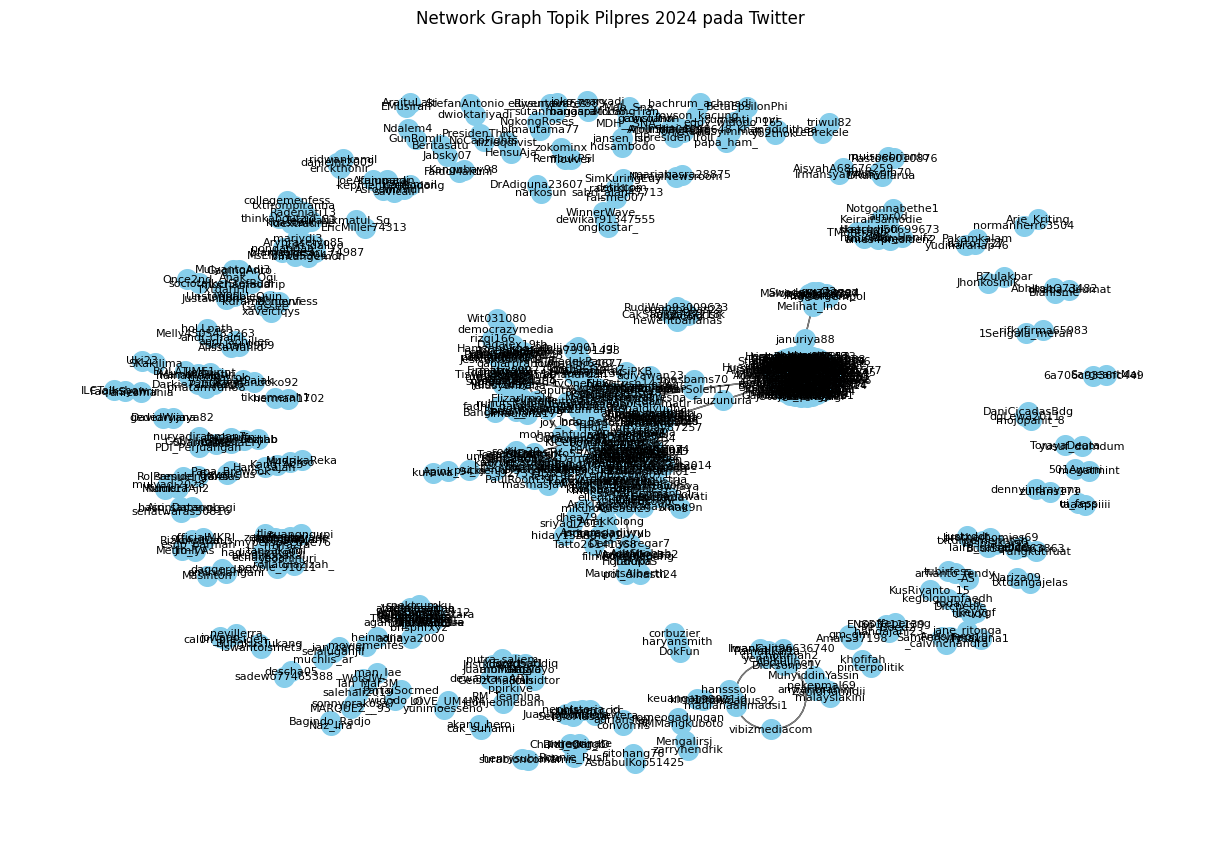

In [ ]:
layout = nx.spring_layout(my_graph)
plt.figure(figsize=(12, 8))
nx.draw(my_graph, pos=layout, with_labels=True, node_size=200, node_color='skyblue', font_size=8)
nx.draw_networkx_edges(my_graph, pos=layout, width=1, edge_color='gray')
plt.title("Network Graph Topik Pilpres 2024 pada Twitter")
plt.axis('off')  # Turn off the axis
plt.show()

# **Centrality 🎯**

## Closeness

In [ ]:
most_influential = nx.closeness_centrality(my_graph)
most_influential_closeness = dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))
most_influential_closeness

{'gus_dibyo': 0.13485230586548727,
 'fauzunuria': 0.13140793582403135,
 'prabowo': 0.12852312875446517,
 'UmarSoleh17': 0.12727065448624325,
 'cakimiNOW': 0.11847805518817062,
 'Kemhan_RI': 0.11823053835978306,
 'Ali_van_Jibril': 0.11612794328635327,
 'jokowi': 0.11356458400310936,
 'januriya88': 0.10704858328161948,
 'aniesbaswedan': 0.1060456296593682,
 'sanuktri18465': 0.10597943388554837,
 'KasanTonimin': 0.10597943388554837,
 'Arida_237': 0.10597943388554837,
 'Jinjiu527328472': 0.10597943388554837,
 'Bonang041021': 0.10597943388554837,
 'KasitiWithlove': 0.10597943388554837,
 'zhafgio': 0.10597943388554837,
 'Melon1060_': 0.10597943388554837,
 'raisa_claduia': 0.10597943388554837,
 'julies_2382137': 0.10597943388554837,
 'Kalong_hi': 0.10597943388554837,
 'mintal31285': 0.10597943388554837,
 'StanleyChu60572': 0.10597943388554837,
 'calistayei': 0.10597943388554837,
 'kungfumatapanda': 0.10597943388554837,
 'luhaniexo90_': 0.10597943388554837,
 'JuliyanRis95121': 0.10597943388554

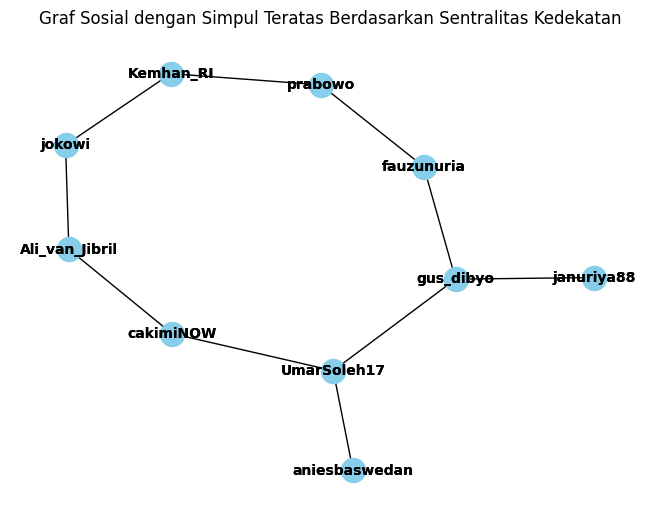

In [ ]:
from wordcloud import WordCloud
# Visualisasikan graf
influential_nodes = list(most_influential_closeness.keys())[:10]
subgraph = my_graph.subgraph(influential_nodes)
pos = nx.spring_layout(subgraph)  # Anda bisa menggunakan layout lain sesuai kebutuhan
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
labels = {node: node for node in influential_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.title("Graf Sosial dengan Simpul Teratas Berdasarkan Sentralitas Kedekatan")
plt.show()


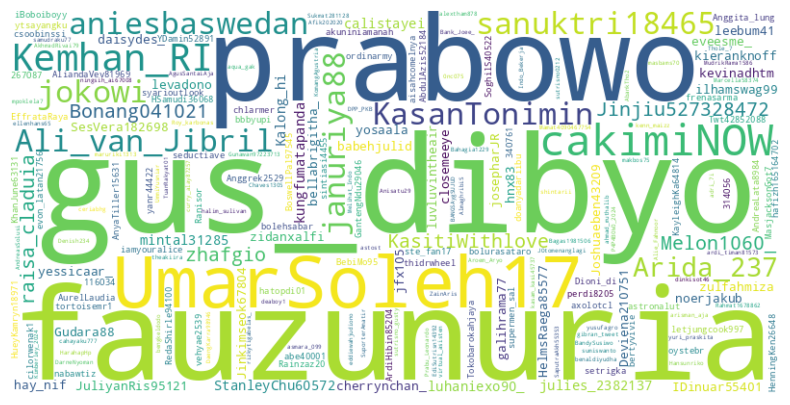

In [ ]:
text = " ".join(most_influential_closeness.keys())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


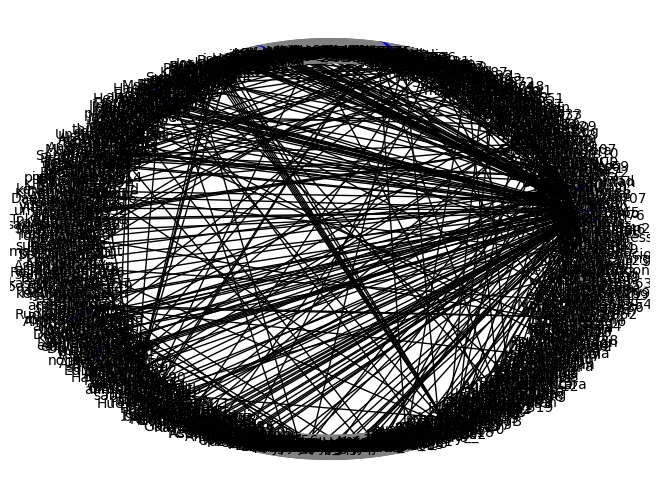

In [ ]:
# Ambil 10 node paling berpengaruh
top_10_nodes = list(most_influential_closeness.keys())[:10]

# Buat grafik lingkaran
pos = nx.circular_layout(my_graph)

# Inisialisasi warna node
node_colors = ['blue' if node in top_10_nodes else 'gray' for node in my_graph.nodes()]

# Gambar grafik dengan node berbeda warna
nx.draw(my_graph, pos, with_labels=True, node_color=node_colors, node_size=300, font_size=10)
plt.show()

## Betweeness

In [ ]:
most_influential = nx.betweenness_centrality(my_graph)
most_influential_betweenness = dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))
most_influential_betweenness

{'gus_dibyo': 0.16481198936289504,
 'jokowi': 0.10094547623060394,
 'prabowo': 0.10072863556814951,
 'fauzunuria': 0.07564205778801367,
 'UmarSoleh17': 0.06367735856822923,
 'cakimiNOW': 0.05533609695393166,
 'Ali_van_Jibril': 0.04604118237095988,
 'Kemhan_RI': 0.040746330280619705,
 'theakiira': 0.03324593083659031,
 'aniesbaswedan': 0.02979365655242573,
 'mohmahfudmd': 0.02671548013654579,
 'evntsite': 0.02566417652006135,
 'SaputraAkh55353': 0.022665316837241777,
 'ganjarpranowo': 0.020762215735747623,
 'Gus_Raharjo': 0.01942231896964,
 'gibran_tweet': 0.01736083911966469,
 'aqua_gak': 0.015893029026224574,
 'Thole_7': 0.015823150117910915,
 'Roy_karbonas': 0.014834795615446365,
 'Anisatu29': 0.013770015996306008,
 'kenn_maizz': 0.013659887370040225,
 'Lembayung071': 0.013096450565169811,
 'tvOneNews': 0.012570293045729646,
 'Dennysiregar7': 0.012570293045729646,
 'Gunawan97223713': 0.012430119230198388,
 'KompasTV': 0.011197414205379376,
 'januriya88': 0.011081976945530104,
 'dinki

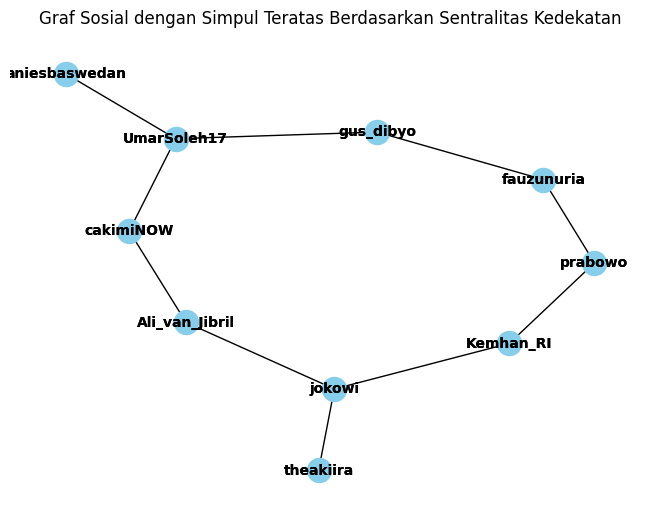

In [ ]:
# Visualisasikan graf
influential_nodes = list(most_influential_betweenness.keys())[:10]
subgraph = my_graph.subgraph(influential_nodes)
pos = nx.spring_layout(subgraph)  # Anda bisa menggunakan layout lain sesuai kebutuhan
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
labels = {node: node for node in influential_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.title("Graf Sosial dengan Simpul Teratas Berdasarkan Sentralitas Kedekatan")
plt.show()

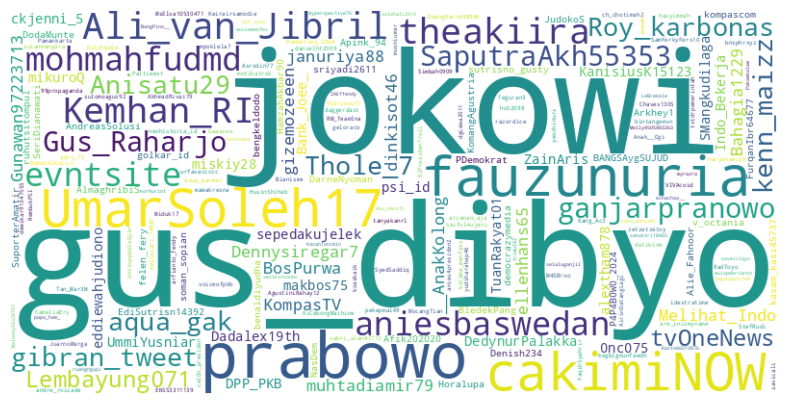

In [ ]:
text = " ".join(most_influential_betweenness.keys())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Degree

In [ ]:
most_influential = nx.degree_centrality(my_graph)
most_influential_degree = dict(sorted(most_influential.items(), key=lambda item: item[1], reverse=True))
most_influential_degree

{'gus_dibyo': 0.18651362984218078,
 'prabowo': 0.028694404591104734,
 'AgustiniRahay12': 0.02582496413199426,
 'jokowi': 0.02295552367288379,
 'Gus_Raharjo': 0.021520803443328552,
 'ganjarpranowo': 0.01865136298421808,
 'aqua_gak': 0.017216642754662843,
 'gizemozeeen': 0.017216642754662843,
 'miskiy28': 0.015781922525107604,
 'kenn_maizz': 0.015781922525107604,
 'muhtadiamir79': 0.015781922525107604,
 'aniesbaswedan': 0.01291248206599713,
 'cakimiNOW': 0.01291248206599713,
 'KompasTV': 0.01291248206599713,
 'Melihat_Indo': 0.011477761836441894,
 'tvOneNews': 0.011477761836441894,
 'Dennysiregar7': 0.011477761836441894,
 'DPP_PKB': 0.010043041606886658,
 'alextham878': 0.008608321377331422,
 'gibran_tweet': 0.008608321377331422,
 'tanyakanrl': 0.007173601147776184,
 'BosPurwa': 0.007173601147776184,
 'VIVAcoid': 0.007173601147776184,
 'Lembayung071': 0.007173601147776184,
 'UmarSoleh17': 0.007173601147776184,
 'Bank_Joee_': 0.007173601147776184,
 'Bahagia1229': 0.007173601147776184,
 'a

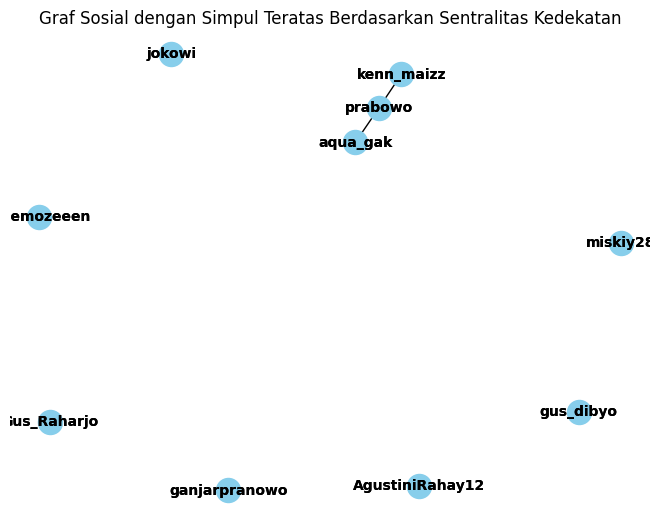

In [ ]:
# Visualisasikan graf
influential_nodes = list(most_influential_degree.keys())[:10]
subgraph = my_graph.subgraph(influential_nodes)
pos = nx.spring_layout(subgraph)  # Anda bisa menggunakan layout lain sesuai kebutuhan
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
labels = {node: node for node in influential_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.title("Graf Sosial dengan Simpul Teratas Berdasarkan degree centrality")
plt.show()

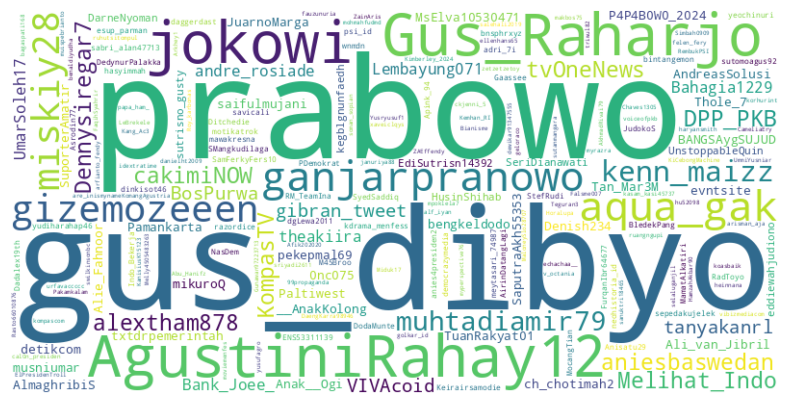

In [ ]:
text = " ".join(most_influential_degree.keys())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **PageRank 🥇**

In [ ]:
# Menghitung sentralitas PageRank
pagerank_centrality = nx.pagerank(my_graph)
most_influential_pagerank= dict(sorted(pagerank_centrality.items(), key=lambda item: item[1], reverse=True))
most_influential_pagerank

{'gus_dibyo': 0.08484618404806368,
 'AgustiniRahay12': 0.012533617479399416,
 'prabowo': 0.010154786932959419,
 'Gus_Raharjo': 0.009860269834789177,
 'jokowi': 0.00877688890610244,
 'ganjarpranowo': 0.008704780206107725,
 'KompasTV': 0.00614418703518831,
 'Melihat_Indo': 0.0056464183634318005,
 'Dennysiregar7': 0.005380547153049356,
 'tvOneNews': 0.0053189710100051725,
 'gizemozeeen': 0.004701239172638906,
 'aniesbaswedan': 0.004593697316638339,
 'aqua_gak': 0.004573416762848742,
 'kenn_maizz': 0.004373822383717702,
 'cakimiNOW': 0.0041702981325141735,
 'miskiy28': 0.004078965152880212,
 'VIVAcoid': 0.004068099467642923,
 'muhtadiamir79': 0.004046988561729546,
 'tanyakanrl': 0.003730547696075651,
 'txtdrpemerintah': 0.0034092407898439385,
 'pekepmal69': 0.0034092407898439385,
 'JuarnoMarga': 0.0034092407898439385,
 'gibran_tweet': 0.0033603084596149986,
 'DPP_PKB': 0.0033573363807843635,
 'ch_chotimah2': 0.0031587788718594975,
 'theakiira': 0.003119618098944502,
 'BosPurwa': 0.00308009

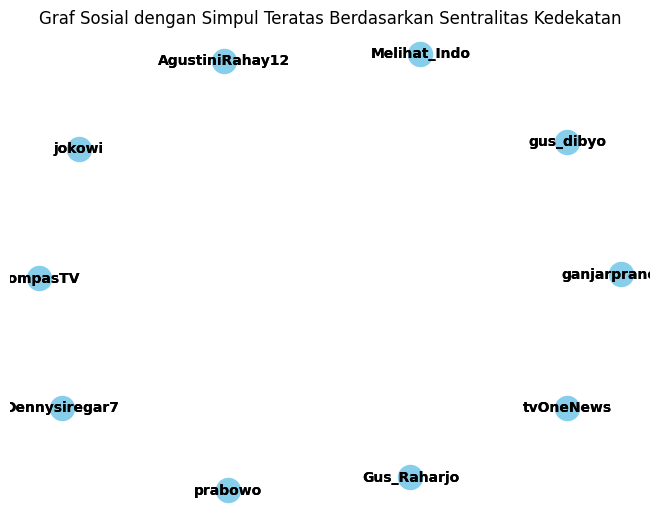

In [ ]:
# Visualisasikan graf
influential_nodes = list(most_influential_pagerank.keys())[:10]
subgraph = my_graph.subgraph(influential_nodes)
pos = nx.spring_layout(subgraph)  # Anda bisa menggunakan layout lain sesuai kebutuhan
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
labels = {node: node for node in influential_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_color='black', font_weight='bold')

plt.title("Graf Sosial dengan Simpul Teratas Berdasarkan Sentralitas Kedekatan")
plt.show()

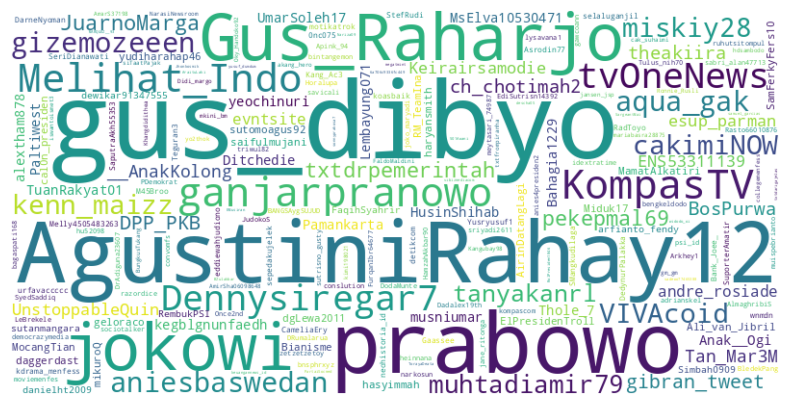

In [ ]:
text = " ".join(most_influential_pagerank.keys())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Top 10 Most Influential User 🥇**

In [ ]:
print("Top 10 Most Influential User (Closeness Centrality)")
count = 1
for k, v in most_influential_closeness.items():
  print("[{}] User : {}\nScore : {}\n".format(count,k,v))
  count +=1
  if count == 11:
    break

Top 10 Most Influential User (Closeness Centrality)
[1] User : gus_dibyo
Score : 0.13485230586548727

[2] User : fauzunuria
Score : 0.13140793582403135

[3] User : prabowo
Score : 0.12852312875446517

[4] User : UmarSoleh17
Score : 0.12727065448624325

[5] User : cakimiNOW
Score : 0.11847805518817062

[6] User : Kemhan_RI
Score : 0.11823053835978306

[7] User : Ali_van_Jibril
Score : 0.11612794328635327

[8] User : jokowi
Score : 0.11356458400310936

[9] User : januriya88
Score : 0.10704858328161948

[10] User : aniesbaswedan
Score : 0.1060456296593682



In [ ]:
print("Top 10 Most Influential User (Betweeness Centrality)")
count = 1
for k, v in most_influential_betweenness.items():
  print("[{}] User : {}\nScore : {}\n".format(count,k,v))
  count +=1
  if count == 11:
    break

Top 10 Most Influential User (Betweeness Centrality)
[1] User : gus_dibyo
Score : 0.16481198936289504

[2] User : jokowi
Score : 0.10094547623060394

[3] User : prabowo
Score : 0.10072863556814951

[4] User : fauzunuria
Score : 0.07564205778801367

[5] User : UmarSoleh17
Score : 0.06367735856822923

[6] User : cakimiNOW
Score : 0.05533609695393166

[7] User : Ali_van_Jibril
Score : 0.04604118237095988

[8] User : Kemhan_RI
Score : 0.040746330280619705

[9] User : theakiira
Score : 0.03324593083659031

[10] User : aniesbaswedan
Score : 0.02979365655242573



In [ ]:
print("Top 10 Most Influential User (Degree Centrality)")
count = 1
for k, v in most_influential_degree.items():
  print("[{}] User : {}\nScore : {}\n".format(count,k,v))
  count +=1
  if count == 11:
    break

Top 10 Most Influential User (Degree Centrality)
[1] User : gus_dibyo
Score : 0.18651362984218078

[2] User : prabowo
Score : 0.028694404591104734

[3] User : AgustiniRahay12
Score : 0.02582496413199426

[4] User : jokowi
Score : 0.02295552367288379

[5] User : Gus_Raharjo
Score : 0.021520803443328552

[6] User : ganjarpranowo
Score : 0.01865136298421808

[7] User : aqua_gak
Score : 0.017216642754662843

[8] User : gizemozeeen
Score : 0.017216642754662843

[9] User : miskiy28
Score : 0.015781922525107604

[10] User : kenn_maizz
Score : 0.015781922525107604



In [ ]:
print("Top 10 Most Influential User (Page Rank)")
count = 1
for k, v in most_influential_pagerank.items():
  print("[{}] User : {}\nScore : {}\n".format(count,k,v))
  count +=1
  if count == 11:
    break

Top 10 Most Influential User (Page Rank)
[1] User : gus_dibyo
Score : 0.08484618404806368

[2] User : AgustiniRahay12
Score : 0.012533617479399416

[3] User : prabowo
Score : 0.010154786932959419

[4] User : Gus_Raharjo
Score : 0.009860269834789177

[5] User : jokowi
Score : 0.00877688890610244

[6] User : ganjarpranowo
Score : 0.008704780206107725

[7] User : KompasTV
Score : 0.00614418703518831

[8] User : Melihat_Indo
Score : 0.0056464183634318005

[9] User : Dennysiregar7
Score : 0.005380547153049356

[10] User : tvOneNews
Score : 0.0053189710100051725

